In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def RotationMatric(axis, angle):
    radian = np.radians(angle)
    if axis == 'x':
        R = np.array([[1, 0, 0],
                      [0, np.cos(radian), -np.sin(radian)],
                      [0, np.sin(radian), np.cos(radian)]])
    elif axis == 'y':
        R = np.array([[np.cos(radian), 0, np.sin(radian)],
                      [0, 1, 0],
                      [-np.sin(radian), 0, np.cos(radian)]])
    elif axis == 'z':
        R = np.array([[np.cos(radian), -np.sin(radian), 0],
                      [np.sin(radian), np.cos(radian), 0],
                      [0, 0, 1]])
    else:
        return null
    return R

def checkOrthognal(matrix):
    I = np.eye(matrix.shape[0])
    return np.allclose(np.dot(matrix, matrix.T), I)

برای نوشتن این سوال نیاز داریم ابتدا که تابعی پیاده سازی کنیم تا نسبت به اینکه در کدام جهت قرار هستش تا چرخش بدیم نسبت بهش بیایم یک ماتریس متعامد تولید کنیم. برای همین میایم از کاربر یک ورودی میگیریم تا بتونیم ماتریس متناسب با اون جهت تولید کنیم که در تابع فوق پیاده سازی کردیم.
در بخش دوم میایم چک میکنیم که ایا یک ماتریس متعامد هستش یا نه برای همین طبق تعریف ماتریس متعامد که آیا ترانهاده آن ضرب در خود ماتریس، ماتریس یک را تشکیل می‌دهد یا نه.

In [2]:

def plot_points(firstPoints, rotatedPoints):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(firstPoints[:, 0], firstPoints[:, 1], firstPoints[:, 2], c='b', label='Original Points')
    for point in firstPoints:
        ax.text(point[0], point[1], point[2], f'({point[0]}, {point[1]}, {point[2]})', color='blue')
    ax.scatter(rotatedPoints[:, 0], rotatedPoints[:, 1], rotatedPoints[:, 2], c='r', label='Rotated Points')
    for point in rotatedPoints:
        ax.text(point[0], point[1], point[2], f'({point[0]}, {point[1]}, {point[2]})', color='red')
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.legend()
    plt.show()



برای اینکه بتونیم نمایش بدیم خروجیمون رو یه تابع نوشتم تا بیاد نقاط اولیه رو به عنوان آرگومان اول و نقاط چرخش یافته به عنوان نقاط تبدیل یافته در آرگومان دوم پاس دادم و با استفاده از مت‌پلاتلیب میام یک فیگر درست می کنیم و نقاط اولیه رو با رنگ آبی و نقاط دوم رو با رنگ قرمز قرار می‌دیم. هر سه جهت مختصات رو هم نامگذاری میکنیم تا بتونیم بفهمیم چرخش در جهت درست انجام شده یا نه.


Original points:
[[1. 3. 4.]
 [0. 0. 5.]]

Rotated points:
[[-1.41421356  2.82842712  4.        ]
 [ 0.          0.          5.        ]]


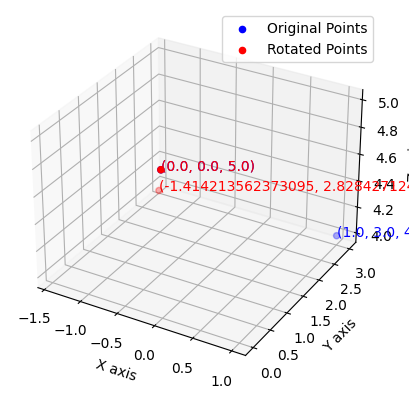

In [3]:
customMatrix = input("Do you want to enter a custom rotation matrix?(yes/no) :")
if customMatrix == 'yes':
    print("enter custom rotation matrix with values separated by spaces:")
    R = []
    for i in range(3):
        row = list(map(float, input(f"Row {i+1}: ").split()))
        R.append(row)
    R = np.array(R)
else:
    axis = input("enter the axis of rotation (x, y, or z): ")
    angle = float(input("Enter the angle of rotation in degrees: "))
    R = RotationMatric(axis, angle)
    if R is None :
        print("error in input .")
if not checkOrthognal(R):
    print("Error : The rotation matrix is not orthogonal .")
else :
    numberOfPoints = int(input("how many 3D points will you input? "))
    points = []
    for i in range(numberOfPoints):
        coordinates = input("enter the coordinates of each point as x, y, z (separated by commas): ")
        x, y, z = map(float, coordinates.split(','))
        points.append([x, y, z])

    points = np.array(points)
    rotatedPoints = np.dot(points, R.T)

    print("\nOriginal points:")
    print(points)
    print("\nRotated points:")
    print(rotatedPoints)

    plot_points(points, rotatedPoints)

برای اینکه بتونیم سوال رو پیاده سازی کنیم اول میام از خود کاربر میپرسم که ایا دوست داره خودش یه ماتریس متعامد بهم ورودی بده یا نه، اگه نه گفت میام از همون ماتریس های متعمادی که تو بالا تعریف کردم استفاده میکنم به عنوان دیفالت. بعد از اینکه ماتریس متعامد رو بهم پاس داد کاربر چک میکنم که آیا واقعا متعماد هستش یا نه.
در ادامه نقاط ورودی رو از کاربر میگیرم و با استفاده از ضرب ماتریس متعامد داخل مختصات ماتریس میام ماتریس   های حاصل از چرخش در اون جهت رو حساب میکنم و آخر هم میام تمام نقاط حاصل و نقاط اولیه رو به تابع پلات کردن نقاط پاس میدم تا شکل ۳ بعدی رو رسم کنیم.